<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='alinco.png' width="120"/>
<h1 style="color:#000047;">Actividad 1: Extracción de datos de diferentes fuentes</h1>
<br style="clear:both"/>
</div>

<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Practicar la extracción, análisis y manipulación de datos provenientes de archivos JSON, XML, CSV e imágenes usando Python.
</div>

<div style="margin-top:10px;">
<b>Instrucciones generales:</b>
<ul>
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>pandas</b> para manipulación de datos tabulares, <b>json</b> y <b>xml.etree.ElementTree</b> para extracción de datos, y <b>matplotlib</b> o <b>opencv</b> para imágenes.</li>
<li>Responde cada pregunta con código y, cuando sea necesario, justifica tu respuesta.</li>
</ul>
</div>

In [8]:
#Cargar archivos
from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

ruta_carpeta_drive = '/content/drive/MyDrive/Actividad 1'

archivos_necesarios = ['empleados.json', 'libros.xml', 'ventas_detalladas.csv', 'alinco.png']

print("--- Copiando archivos ---")
for archivo in archivos_necesarios:
    ruta_origen = os.path.join(ruta_carpeta_drive, archivo)
    if os.path.exists(ruta_origen):
        shutil.copy(ruta_origen, '.')
        print(f" {archivo} cargado correctamente.")
    else:
        print(f"Error: No se encontró {archivo} en la ruta especificada.")

Mounted at /content/drive
--- Copiando archivos ---
 empleados.json cargado correctamente.
 libros.xml cargado correctamente.
 ventas_detalladas.csv cargado correctamente.
 alinco.png cargado correctamente.


## 1️⃣ JSON: Información de empleados

Supón que tienes el archivo <code>empleados.json</code> con la siguiente estructura:

```json
[
  {"nombre": "Ana", "edad": 28, "departamento": "Ventas", "salario": 2500},
  {"nombre": "Luis", "edad": 35, "departamento": "IT", "salario": 3200},
  {"nombre": "María", "edad": 24, "departamento": "Ventas", "salario": 2300},
  {"nombre": "Carlos", "edad": 40, "departamento": "IT", "salario": 4000}
]
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo JSON.
2. ¿Cuál es el <b>salario promedio por departamento</b>?
3. ¿Quién es el <b>empleado más joven</b> y a qué departamento pertenece?
4. ¿Cuántos empleados tienen un <b>salario mayor a 2500</b>?
5. ¿Cuál es la <b>diferencia de edad</b> entre el empleado más joven y el de mayor edad?
6. ¿Cuál es el <b>salario total pagado</b> en la empresa?

<i>Tip: Usa pandas.read_json o json.load para cargar los datos.</i>

In [13]:
# Tu código aquí

import pandas as pd
import json

# Cargar datos
with open('empleados.json', 'r') as f:
    data = json.load(f)
df_empleados = pd.DataFrame(data)

display(df_empleados)

# Respuestas
print(f"\nSalario promedio por depto:\n{df_empleados.groupby('departamento')['salario'].mean()}")
joven = df_empleados.loc[df_empleados['edad'].idxmin()]
print(f"\nEmpleado más joven: {joven['nombre']} ({joven['departamento']})")
print(f"Empleados salario > 2500: {df_empleados[df_empleados['salario'] > 2500].shape[0]}")
print(f"Diferencia de edad (Mayor - Menor): {df_empleados['edad'].max() - df_empleados['edad'].min()} años")
print(f"Salario total pagado: {df_empleados['salario'].sum()}")

,nombre,edad,departamento,salario
0,Ana,28,Ventas,2500
1,Luis,35,IT,3200
2,María,24,Ventas,2300
3,Carlos,40,IT,4000



Salario promedio por depto:
departamento
IT        3600.0
Ventas    2400.0
Name: salario, dtype: float64

Empleado más joven: María (Ventas)
Empleados salario > 2500: 2
Diferencia de edad (Mayor - Menor): 16 años
Salario total pagado: 12000


## 2️⃣ XML: Catálogo de libros

Supón que tienes el archivo <code>libros.xml</code> con la siguiente estructura:

```xml
<libros>
  <libro>
    <titulo>Python para Todos</titulo>
    <autor>Juan Pérez</autor>
    <precio>29.99</precio>
    <anio>2020</anio>
  </libro>
  <libro>
    <titulo>Data Science Avanzado</titulo>
    <autor>María López</autor>
    <precio>45.50</precio>
    <anio>2022</anio>
  </libro>
  <libro>
    <titulo>Ingeniería de Características</titulo>
    <autor>Pedro Ruiz</autor>
    <precio>39.00</precio>
    <anio>2019</anio>
  </libro>
</libros>
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo XML.
2. ¿Cuál es el <b>libro más caro</b> y su autor?
3. ¿Cuál es el <b>precio promedio</b> de los libros publicados después de 2020?
4. ¿Cuántos libros fueron <b>publicados antes de 2021</b>?
5. ¿Cuál es la <b>diferencia de precio</b> entre el libro más barato y el más caro?
6. ¿Cuántos <b>autores diferentes</b> hay en la lista?

<i>Tip: Usa xml.etree.ElementTree para leer el archivo y pandas para tabular los datos.</i>

In [14]:
# Tu código aquí
import xml.etree.ElementTree as ET
import pandas as pd

# Cargar y parsear XML
tree = ET.parse('libros.xml')
root = tree.getroot()

lista_libros = []
for libro in root.findall('libro'):
    lista_libros.append({
        'titulo': libro.find('titulo').text,
        'autor': libro.find('autor').text,
        'precio': float(libro.find('precio').text),
        'anio': int(libro.find('anio').text)
    })

df_libros = pd.DataFrame(lista_libros)
display(df_libros)

# Respuestas
caro = df_libros.loc[df_libros['precio'].idxmax()]
print(f"\nLibro más caro: {caro['titulo']} de {caro['autor']}")
print(f"Precio promedio (>2020): {df_libros[df_libros['anio'] > 2020]['precio'].mean()}")
print(f"Libros antes de 2021: {df_libros[df_libros['anio'] < 2021].shape[0]}")
print(f"Diferencia precio (Caro - Barato): {df_libros['precio'].max() - df_libros['precio'].min()}")
print(f"Autores diferentes: {df_libros['autor'].nunique()}")

,titulo,autor,precio,anio
0,Python para Todos,Juan Pérez,29.99,2020
1,Data Science Avanzado,María López,45.50,2022
2,Ingeniería de Características,Pedro Ruiz,39.00,2019



Libro más caro: Data Science Avanzado de María López
Precio promedio (>2020): 45.5
Libros antes de 2021: 2
Diferencia precio (Caro - Barato): 15.510000000000002
Autores diferentes: 3


## 3️⃣ CSV: Ventas detalladas

Supón que tienes el archivo <code>ventas_detalladas.csv</code> con la siguiente estructura:

```csv
producto,fecha,cantidad,precio_unitario
A,2023-01-01,10,2.5
B,2023-01-02,5,3.0
A,2023-01-03,7,2.5
C,2023-01-01,3,4.0
B,2023-01-03,2,3.0
```

<b>Ejercicios:</b>

1. Crea un DataFrame con los datos extraídos del archivo.
2. ¿Cuál es el <b>total vendido</b> por producto y por fecha?
3. ¿En qué fecha se vendió la <b>mayor cantidad de productos</b>?
4. ¿Cuál es el <b>producto con mayor ingreso total</b>?
5. ¿Cuál es la <b>media de cantidad vendida</b> por producto?
6. ¿Qué producto tuvo <b>ventas todos los días registrados</b>?

<i>Tip: Usa pandas.read_csv y agrupa los datos según lo que se pide.</i>

In [15]:
# Tu código aquí
import pandas as pd

# Cargar CSV
df_ventas = pd.read_csv('ventas_detalladas.csv')
df_ventas['ingreso'] = df_ventas['cantidad'] * df_ventas['precio_unitario'] # Columna auxiliar

display(df_ventas)

# Respuestas
print(f"\nTotal vendido por producto/fecha:\n{df_ventas.groupby(['producto', 'fecha'])['ingreso'].sum()}")
print(f"\nFecha mayor cantidad productos: {df_ventas.groupby('fecha')['cantidad'].sum().idxmax()}")
print(f"Producto mayor ingreso total: {df_ventas.groupby('producto')['ingreso'].sum().idxmax()}")
print(f"\nMedia cantidad por producto:\n{df_ventas.groupby('producto')['cantidad'].mean()}")

dias_totales = df_ventas['fecha'].nunique()
ventas_por_dia = df_ventas.groupby('producto')['fecha'].nunique()
print(f"\nProducto con ventas todos los días: {ventas_por_dia[ventas_por_dia == dias_totales].index.tolist()}")

,Unnamed: 0,producto,fecha,cantidad,precio_unitario,ingreso
0,0,A,2023-01-01,10,2.5,25.0
1,1,B,2023-01-02,5,3.0,15.0
2,2,A,2023-01-03,7,2.5,17.5
3,3,C,2023-01-01,3,4.0,12.0
4,4,B,2023-01-03,2,3.0,6.0



Total vendido por producto/fecha:
producto  fecha     
A         2023-01-01    25.0
          2023-01-03    17.5
B         2023-01-02    15.0
          2023-01-03     6.0
C         2023-01-01    12.0
Name: ingreso, dtype: float64

Fecha mayor cantidad productos: 2023-01-01
Producto mayor ingreso total: A

Media cantidad por producto:
producto
A    8.5
B    3.5
C    3.0
Name: cantidad, dtype: float64

Producto con ventas todos los días: []


## 4️⃣ Imágenes: Análisis de pixeles

Supón que tienes la imagen <code>alinco.png</code> en la misma carpeta que este notebook.

<b>Ejercicios:</b>

1. Extrae la información de los pixeles de la imagen y muestra sus dimensiones.
2. ¿Cuál es el <b>valor RGB</b> del píxel (50, 50)?
3. ¿Cuál es el <b>color predominante</b> en la imagen?

<i>Tip: Usa matplotlib.pyplot.imread o cv2.imread para cargar la imagen y numpy para analizar los datos.</i>

Dimensiones: (110, 120, 3)
Valor RGB pixel (50,50): [ 89 128 165]
Color predominante (RGB): (np.uint8(0), np.uint8(0), np.uint8(0))


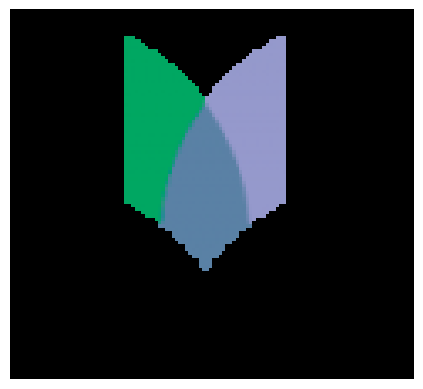

In [16]:
# Tu código aquí
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

img_bgr = cv2.imread('alinco.png')

if img_bgr is None:
    print(" Error")
else:
    # Convertir BGR a RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 1. Dimensiones
    print(f"Dimensiones: {img_rgb.shape}")

    # 2. Valor RGB pixel (50, 50)
    if img_rgb.shape[0] > 50 and img_rgb.shape[1] > 50:
        print(f"Valor RGB pixel (50,50): {img_rgb[50, 50]}")
    else:
        print("Pixel fuera de rango.")

    # 3. Color predominante
    pixels = img_rgb.reshape(-1, 3)
    most_common = Counter([tuple(p) for p in pixels]).most_common(1)[0][0]
    print(f"Color predominante (RGB): {most_common}")

    # Mostrar imagen
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()